In [1]:
import __init__
import os
import ast  # for safely evaluating string representations of lists
from utils import comp_metrics, get_callbacks
from pathlib import Path
import tensorflow as tf
from data import load_data_with_sent
from utils import comp_metrics,describe_model_architecture
import numpy as np
import json

In [2]:
version = 'v4'
dir_path = '.'
data_path = str(Path(dir_path) /  'input/stocks_step4.csv')
output_path = str(Path(dir_path) /  f'output/{version}')
model_path = str(Path(output_path) /  'model')

In [3]:
# Daten laden
td, vd = load_data_with_sent(data_path, window_size=30)

In [4]:
# Load the saved model
loaded_model = tf.keras.models.load_model(model_path)

In [5]:
# Print layer details
print(json.dumps(describe_model_architecture(loaded_model), indent=2))

[
  {
    "name": "cnn_input",
    "type": "InputLayer"
  },
  {
    "name": "cnn_layer_1",
    "type": "Conv1D"
  },
  {
    "name": "dropout_4",
    "type": "Dropout",
    "dropout_rate": 0.30000000000000004
  },
  {
    "name": "lstm_input",
    "type": "InputLayer"
  },
  {
    "name": "cnn_layer_2",
    "type": "Conv1D"
  },
  {
    "name": "lstm_1",
    "type": "LSTM",
    "units": 112
  },
  {
    "name": "dropout_5",
    "type": "Dropout",
    "dropout_rate": 0.30000000000000004
  },
  {
    "name": "dropout_3",
    "type": "Dropout",
    "dropout_rate": 0.4
  },
  {
    "name": "flatten_1",
    "type": "Flatten"
  },
  {
    "name": "concatenate_1",
    "type": "Concatenate"
  },
  {
    "name": "dense_3",
    "type": "Dense",
    "units": 64
  },
  {
    "name": "dense_4",
    "type": "Dense",
    "units": 64
  },
  {
    "name": "dense_5",
    "type": "Dense",
    "units": 1
  }
]


Predicting AAPL...
Metrics for AAPL
Mean Absolute Error (MAE): 1.3481199741363525
Mean Squared Error (MSE): 3.4468235969543457
Accuracy: 98.68%


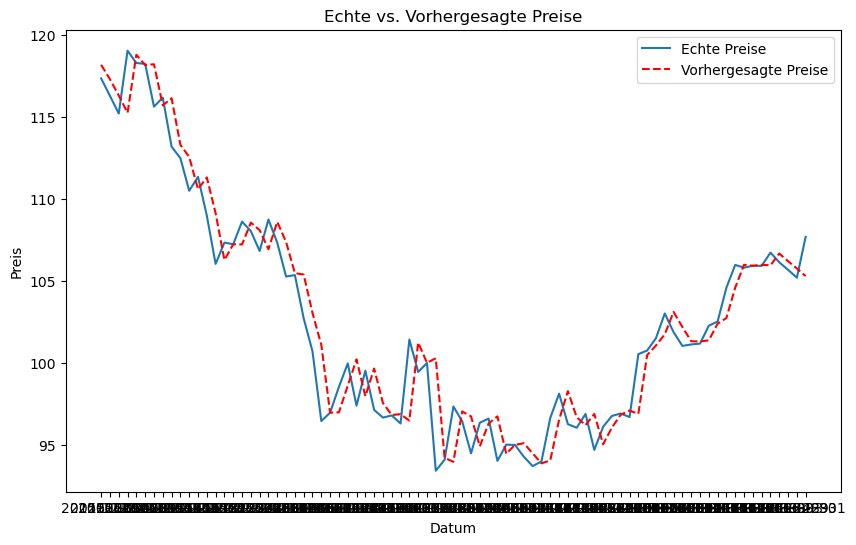

Predicting AMZN...
Metrics for AMZN
Mean Absolute Error (MAE): 10.451191902160645
Mean Squared Error (MSE): 220.58169555664062
Accuracy: 98.22%


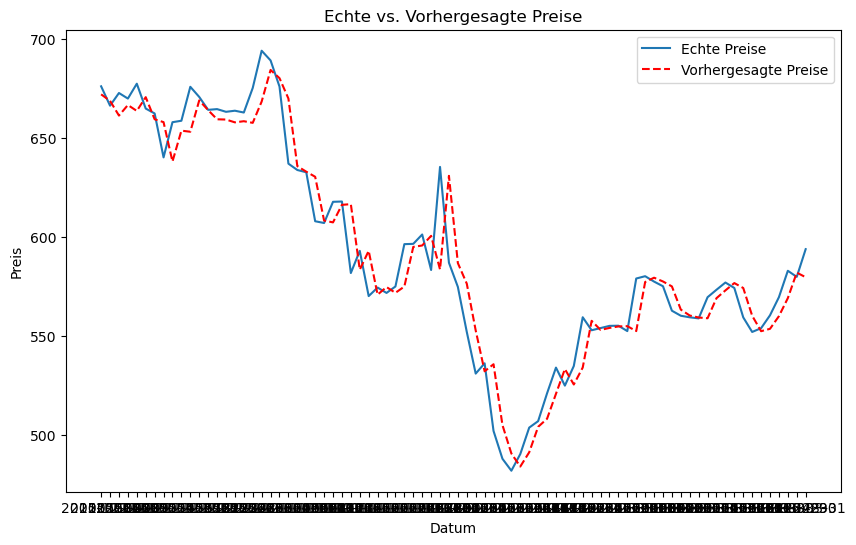

Predicting CSCO...
Metrics for CSCO
Mean Absolute Error (MAE): 0.35255593061447144
Mean Squared Error (MSE): 0.22017133235931396
Accuracy: 98.62%


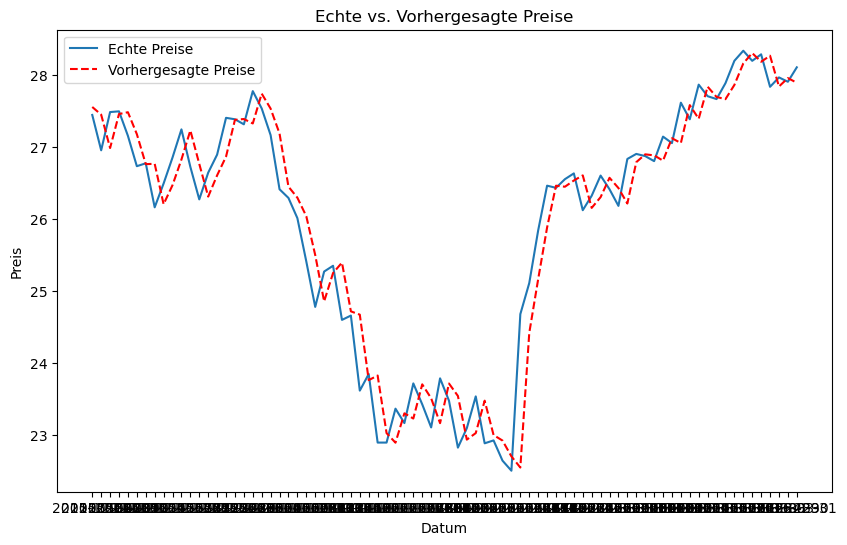

Predicting FB...
Metrics for FB
Mean Absolute Error (MAE): 1.728277564048767
Mean Squared Error (MSE): 6.656918525695801
Accuracy: 98.36%


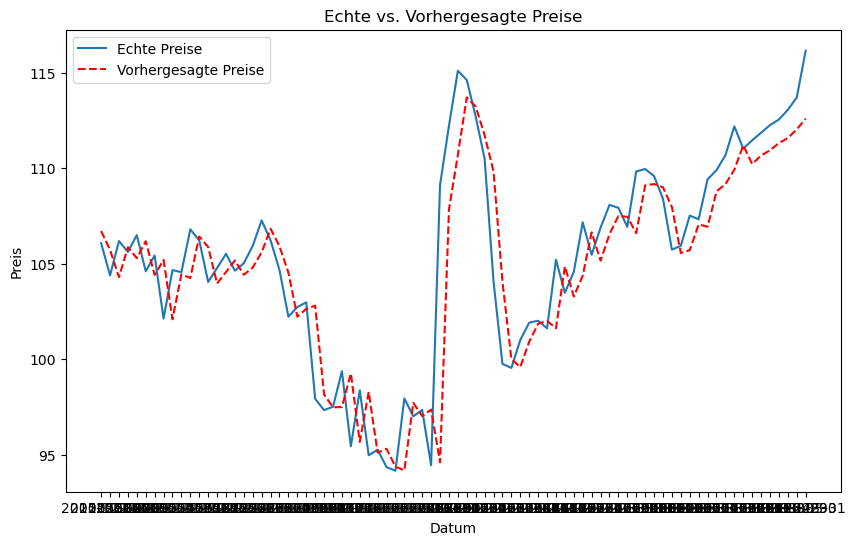

Predicting GOOG...
Metrics for GOOG
Mean Absolute Error (MAE): 8.784950256347656
Mean Squared Error (MSE): 134.70689392089844
Accuracy: 98.79%


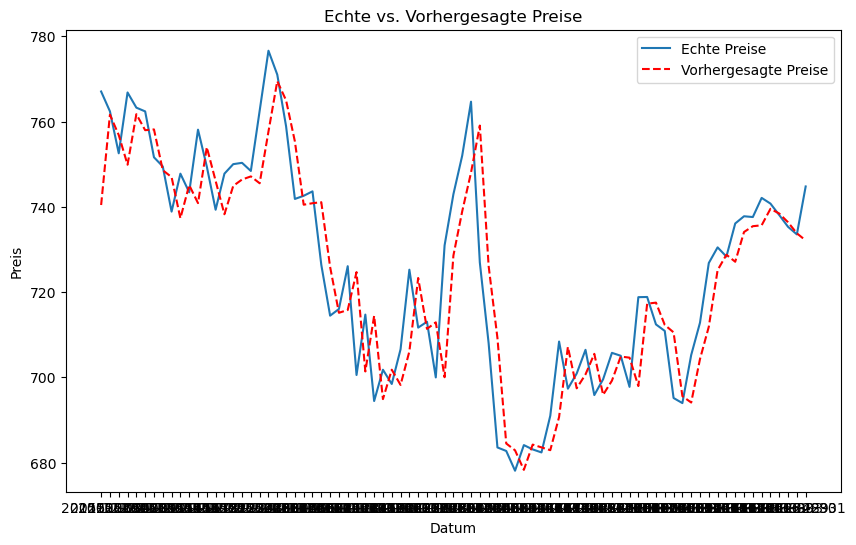

Predicting INTC...
Metrics for INTC
Mean Absolute Error (MAE): 0.41146165132522583
Mean Squared Error (MSE): 0.3295346200466156
Accuracy: 98.69%


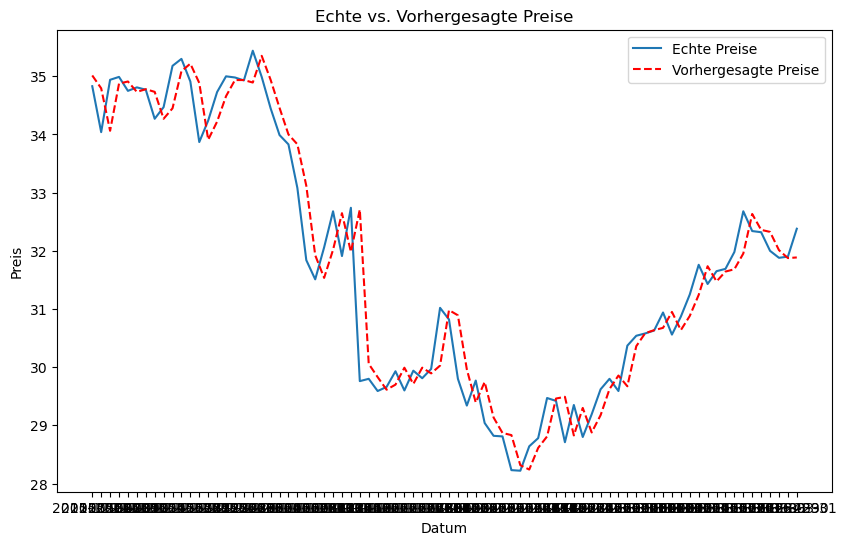

Predicting KO...
Metrics for KO
Mean Absolute Error (MAE): 0.31064724922180176
Mean Squared Error (MSE): 0.15877583622932434
Accuracy: 99.28%


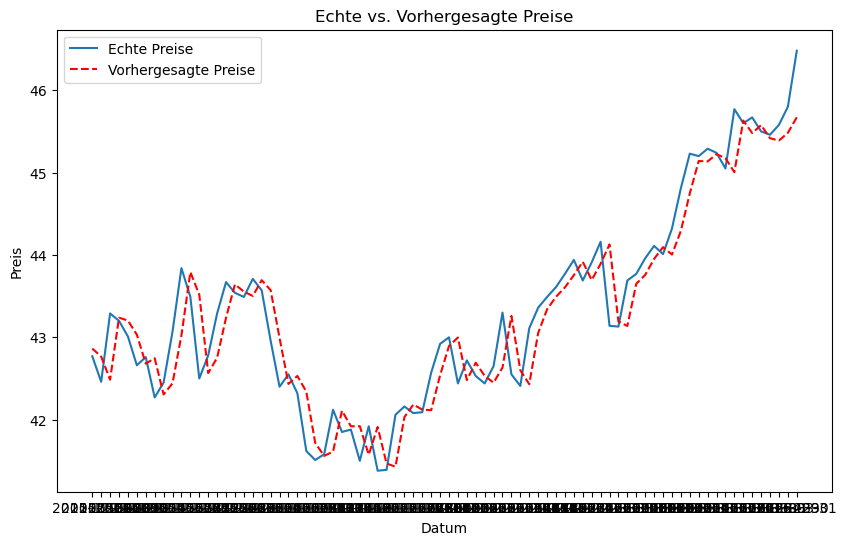

Predicting MA...
Metrics for MA
Mean Absolute Error (MAE): 1.1918914318084717
Mean Squared Error (MSE): 2.3875644207000732
Accuracy: 98.67%


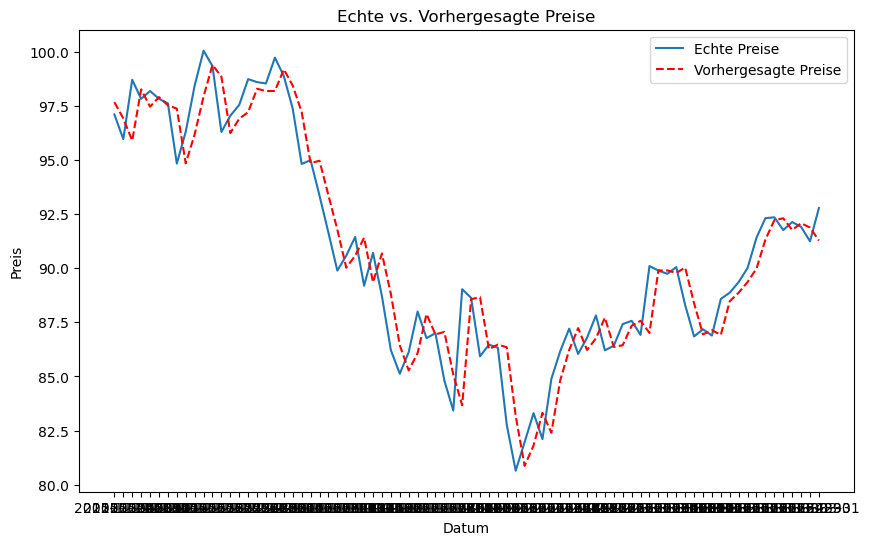

Predicting MSFT...
Metrics for MSFT
Mean Absolute Error (MAE): 0.727049708366394
Mean Squared Error (MSE): 0.8299506306648254
Accuracy: 98.63%


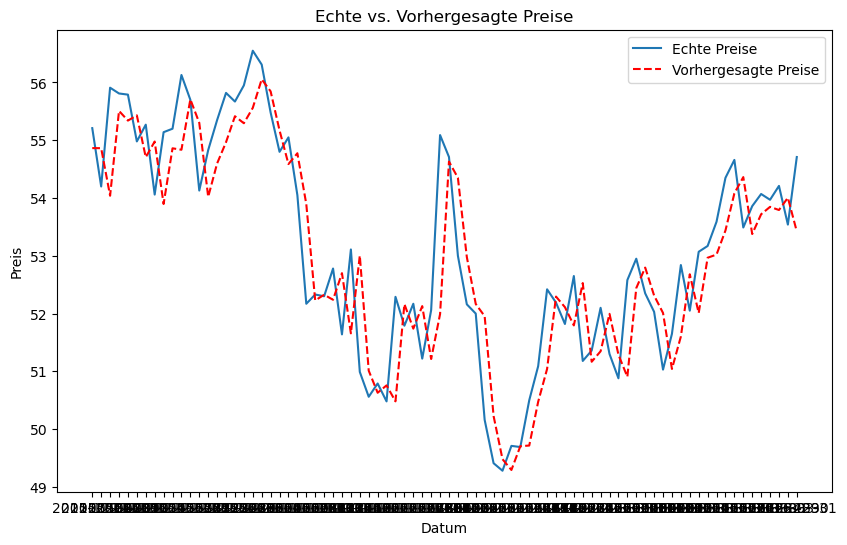

Predicting ORCL...
Metrics for ORCL
Mean Absolute Error (MAE): 0.4542160928249359
Mean Squared Error (MSE): 0.3517690896987915
Accuracy: 98.77%


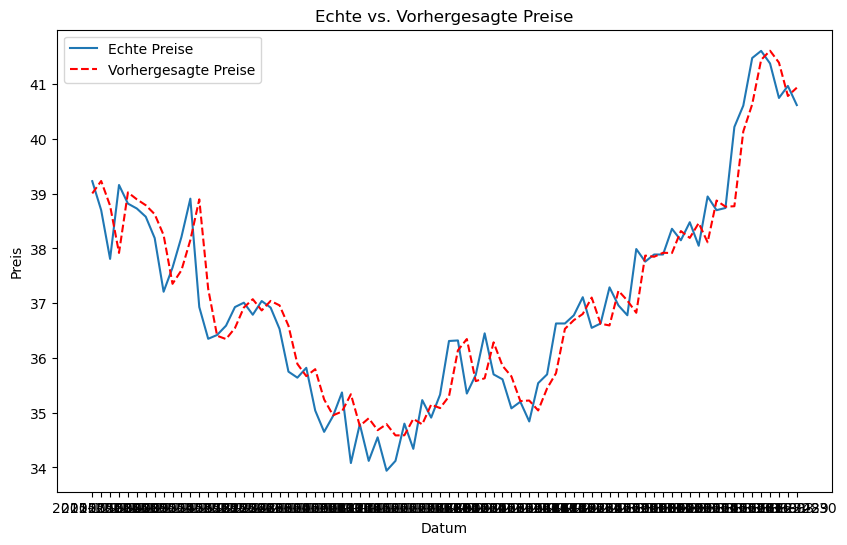

In [6]:
for i in range(len(vd)):
    stock_vd = vd[i]
    scaler = stock_vd['scaler']
    stock_name = stock_vd['stock']
    df = stock_vd['df']
    
    X = []
    y = []
    for i in range(len(stock_vd['val_data'])):
        data = stock_vd['val_data'][i]
        X.append(data[0])
        y.append(data[1])
        
    X = np.array(X)
    X_nums = X[:,:, :1]
    X_sent = X[:,:5, 1:]
    y = np.array(y)
    
    print(f'Predicting {stock_name}...')
    y_pred = loaded_model.predict([X_nums, X_sent])
    print(f'Metrics for {stock_name}')
    comp_metrics(scaler, y, y_pred, df)